<a href="https://colab.research.google.com/github/nevilshah444/Clustering-Techniques/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CMPE 255 : Clustering Assignment**

K-means from scratch

#Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA



In [2]:
cancer=load_breast_cancer()
Data= pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
X= Data.values
y= cancer.target


In [3]:
#Lets have a quick look at the dataset
Data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
#target names of this dataset
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
X.shape
#569 rows and 30 columns

(569, 30)

#Data Transformation

In [9]:
from sklearn.preprocessing import normalize

scale = normalize(X)
scale = pd.DataFrame(scale,columns=Data.columns)
scale.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.007925,0.004573,0.054099,0.440986,0.000052,0.000122,0.000132,0.000065,0.000107,0.000035,0.000482,0.000399,0.003784,0.067580,0.000003,0.000022,0.000024,0.000007,0.000013,0.000003,0.011181,0.007635,0.081325,0.889462,0.000071,0.000293,0.000314,0.000117,0.000203,0.000052
1,0.008666,0.007486,0.055988,0.558619,0.000036,0.000033,0.000037,0.000030,0.000076,0.000024,0.000229,0.000309,0.001432,0.031209,0.000002,0.000006,0.000008,0.000006,0.000006,0.000001,0.010528,0.009862,0.066899,0.824026,0.000052,0.000079,0.000102,0.000078,0.000116,0.000038
2,0.009367,0.010109,0.061842,0.572276,0.000052,0.000076,0.000094,0.000061,0.000098,0.000029,0.000355,0.000374,0.002181,0.044731,0.000003,0.000019,0.000018,0.000010,0.000011,0.000002,0.011212,0.012145,0.072545,0.812984,0.000069,0.000202,0.000214,0.000116,0.000172,0.000042
3,0.016325,0.029133,0.110899,0.551922,0.000204,0.000406,0.000345,0.000150,0.000371,0.000139,0.000708,0.001652,0.004925,0.038925,0.000013,0.000107,0.000081,0.000027,0.000085,0.000013,0.021314,0.037881,0.141333,0.811515,0.000300,0.001238,0.000982,0.000368,0.000949,0.000247
4,0.009883,0.006985,0.065808,0.631774,0.000049,0.000065,0.000096,0.000051,0.000088,0.000029,0.000369,0.000381,0.002649,0.046002,0.000006,0.000012,0.000028,0.000009,0.000009,0.000002,0.010979,0.008120,0.074137,0.767189,0.000067,0.000100,0.000195,0.000079,0.000115,0.000037


In [11]:
#Principal Component Analysis
pca = PCA(2)
  
#Transform the data
transform = pca.fit_transform(scale)

# K-Means Algorithm (from Scratch)

Step 1. Randomly pick k data points as the centroids for each k cluster .

Step 2. Find the distance (Euclidean distance for our purpose) between each data points in our training set with the k centroids.

Step 3. Now add that point to the cluster containing theclosest centroid according to the distance calculated.

Step 4. Calculate the new location of the centroid for that cluster by taking the average of the points in each cluster group.

Step 5. Repeat the Steps 2 to 4 till the  centroids don’t change.


In [35]:
#we will perform all the steps mentioned above for building k Means algorithm
def kmeans(x,k, no_of_iterations):
    Index = np.random.choice(len(x), k, replace=False) 
    centroids = x[Index, :] 
    distances = cdist(x, centroids ,'euclidean')  
    points = np.array([np.argmin(i) for i in distances])
    for _ in range(no_of_iterations): 
        Centroid = []
        for i in range(k):
            temp= x[points==i].mean(axis=0) 
            Centroid.append(temp)
 
        Centroid = np.vstack(Centroid)  
         
        Distance = cdist(x, Centroid ,'euclidean')
        Point = np.array([np.argmin(i) for i in Distance])
         
    return Point

In [42]:
#K means using 3 clusters
label = kmeans(transform, 3, 2000)

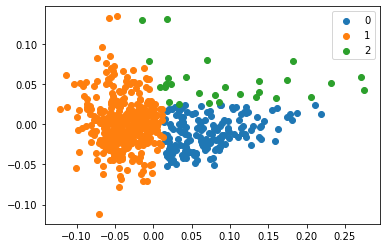

In [43]:
Label = np.unique(label)
for i in Label:
    plt.scatter(transform[label == i , 0] , transform[label == i , 1] , label = i)
plt.legend()
plt.show()

In [44]:
#K means using 4 clusters
label1 = kmeans(transform, 4, 2000)

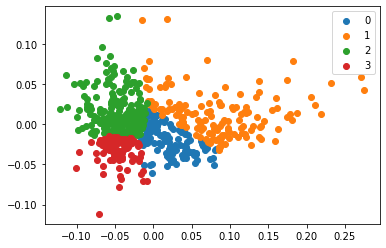

In [46]:
Label = np.unique(label1)
for i in Label:
    plt.scatter(transform[label1 == i , 0] , transform[label1 == i , 1] , label = i)
plt.legend()
plt.show()